# Project

We will be downloading the datasets as a zip file from the website "https://www.fao.org/faostat/en/#data/QCL", from the All Data Normalized option. After loading the data we will be extracting data and analyse the data. In this case the zip file should be in the same dicrectory as this notebook.

We will also be working on the population data. So that we can understand how the use is land will complement the population of that area. We will be loading data from the website given below. We should also be considering that the zip file should be in the same directory as this notebook.
"https://population.un.org/wpp/Download/Archive/CSV/".

In [1]:
import numpy as np 
import pandas as pd
import zipfile

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
with zipfile.ZipFile("Production_Crops_Livestock_E_All_Data_(Normalized).zip","r") as zip_ref:
    zip_ref.extractall("targetdir")

In [3]:
df_main = pd.read_csv("targetdir/Production_Crops_Livestock_E_All_Data_(Normalized).csv" ,encoding='cp1252')
df_main.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1975,1975,ha,0.0,E
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1976,1976,ha,5900.0,E
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1977,1977,ha,6000.0,E
3,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1978,1978,ha,6000.0,E
4,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1979,1979,ha,6000.0,E


In [4]:
with zipfile.ZipFile("WPP2019-CSV-data.zip","r") as zip_ref:
    zip_ref.extractall("targetdir")

In [5]:
df_pop = pd.read_csv("targetdir/WPP2019_TotalPopulationBySex.csv" ,encoding='cp1252')
df_pop.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486


# EDA:

In [6]:
df_main.isna().sum()

Area Code          0
Area Code (M49)    0
Area               0
Item Code          0
Item Code (CPC)    0
Item               0
Element Code       0
Element            0
Year Code          0
Year               0
Unit               0
Value              0
Flag               0
dtype: int64

In [7]:
df_pop.isna().sum()

LocID             0
Location          0
VarID             0
Variant           0
Time              0
MidPeriod         0
PopMale       30056
PopFemale     30056
PopTotal          0
PopDensity        0
dtype: int64

In [8]:
df_pop = df_pop.dropna(how='any',axis=0)

In [9]:
df_pop.isna().sum()

LocID         0
Location      0
VarID         0
Variant       0
Time          0
MidPeriod     0
PopMale       0
PopFemale     0
PopTotal      0
PopDensity    0
dtype: int64

In [10]:
df = pd.merge(df_main, df_pop,  how='inner', left_on=['Area','Year'], right_on = ['Location','Time'])
df.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,...,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1975,1975,...,4,Afghanistan,2,Medium,1975,1975.5,6446.273,6242.891,12689.164,19.436
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5510,Production,1975,1975,...,4,Afghanistan,2,Medium,1975,1975.5,6446.273,6242.891,12689.164,19.436
2,2,'004,Afghanistan,515,'01341,Apples,5312,Area harvested,1975,1975,...,4,Afghanistan,2,Medium,1975,1975.5,6446.273,6242.891,12689.164,19.436
3,2,'004,Afghanistan,515,'01341,Apples,5419,Yield,1975,1975,...,4,Afghanistan,2,Medium,1975,1975.5,6446.273,6242.891,12689.164,19.436
4,2,'004,Afghanistan,515,'01341,Apples,5510,Production,1975,1975,...,4,Afghanistan,2,Medium,1975,1975.5,6446.273,6242.891,12689.164,19.436


In [11]:
df.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,...,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1975,1975,...,4,Afghanistan,2,Medium,1975,1975.5,6446.273,6242.891,12689.164,19.436
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5510,Production,1975,1975,...,4,Afghanistan,2,Medium,1975,1975.5,6446.273,6242.891,12689.164,19.436
2,2,'004,Afghanistan,515,'01341,Apples,5312,Area harvested,1975,1975,...,4,Afghanistan,2,Medium,1975,1975.5,6446.273,6242.891,12689.164,19.436
3,2,'004,Afghanistan,515,'01341,Apples,5419,Yield,1975,1975,...,4,Afghanistan,2,Medium,1975,1975.5,6446.273,6242.891,12689.164,19.436
4,2,'004,Afghanistan,515,'01341,Apples,5510,Production,1975,1975,...,4,Afghanistan,2,Medium,1975,1975.5,6446.273,6242.891,12689.164,19.436


In [12]:
df.isna().sum()

Area Code          0
Area Code (M49)    0
Area               0
Item Code          0
Item Code (CPC)    0
Item               0
Element Code       0
Element            0
Year Code          0
Year               0
Unit               0
Value              0
Flag               0
LocID              0
Location           0
VarID              0
Variant            0
Time               0
MidPeriod          0
PopMale            0
PopFemale          0
PopTotal           0
PopDensity         0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4573719 entries, 0 to 4573718
Data columns (total 23 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Area Code        int64  
 1   Area Code (M49)  object 
 2   Area             object 
 3   Item Code        int64  
 4   Item Code (CPC)  object 
 5   Item             object 
 6   Element Code     int64  
 7   Element          object 
 8   Year Code        int64  
 9   Year             int64  
 10  Unit             object 
 11  Value            float64
 12  Flag             object 
 13  LocID            int64  
 14  Location         object 
 15  VarID            int64  
 16  Variant          object 
 17  Time             int64  
 18  MidPeriod        float64
 19  PopMale          float64
 20  PopFemale        float64
 21  PopTotal         float64
 22  PopDensity       float64
dtypes: float64(6), int64(8), object(9)
memory usage: 837.5+ MB


In [14]:
df.corr().style.background_gradient(cmap='coolwarm')

,Area Code,Item Code,Element Code,Year Code,Year,Value,LocID,VarID,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
Area Code,1.000000,-0.039004,0.018330,-0.044232,-0.044232,0.104458,0.504965,-0.009468,-0.044232,-0.044232,0.404417,0.408576,0.406497,-0.066830
Item Code,-0.039004,1.000000,-0.038329,0.027077,0.027077,0.017899,-0.018940,0.004475,0.027077,0.027077,-0.024456,-0.024644,-0.024550,0.009662
Element Code,0.018330,-0.038329,1.000000,-0.002949,-0.002949,-0.037452,0.008970,0.003562,-0.002949,-0.002949,0.012009,0.012098,0.012054,-0.003417
Year Code,-0.044232,0.027077,-0.002949,1.000000,1.000000,0.015710,0.001724,0.288656,1.000000,1.000000,0.044251,0.043544,0.043904,0.050192
Year,-0.044232,0.027077,-0.002949,1.000000,1.000000,0.015710,0.001724,0.288656,1.000000,1.000000,0.044251,0.043544,0.043904,0.050192
Value,0.104458,0.017899,-0.037452,0.015710,0.015710,1.000000,0.047798,0.004803,0.015710,0.015710,0.226830,0.227369,0.227110,-0.007069
LocID,0.504965,-0.018940,0.008970,0.001724,0.001724,0.047798,1.000000,0.001402,0.001724,0.001724,0.210162,0.206792,0.208510,-0.020947
VarID,-0.009468,0.004475,0.003562,0.288656,0.288656,0.004803,0.001402,1.000000,0.288656,0.288656,0.013920,0.013751,0.013837,0.014943
Time,-0.044232,0.027077,-0.002949,1.000000,1.000000,0.015710,0.001724,0.288656,1.000000,1.000000,0.044251,0.043544,0.043904,0.050192
MidPeriod,-0.044232,0.027077,-0.002949,1.000000,1.000000,0.015710,0.001724,0.288656,1.000000,1.000000,0.044251,0.043544,0.043904,0.050192


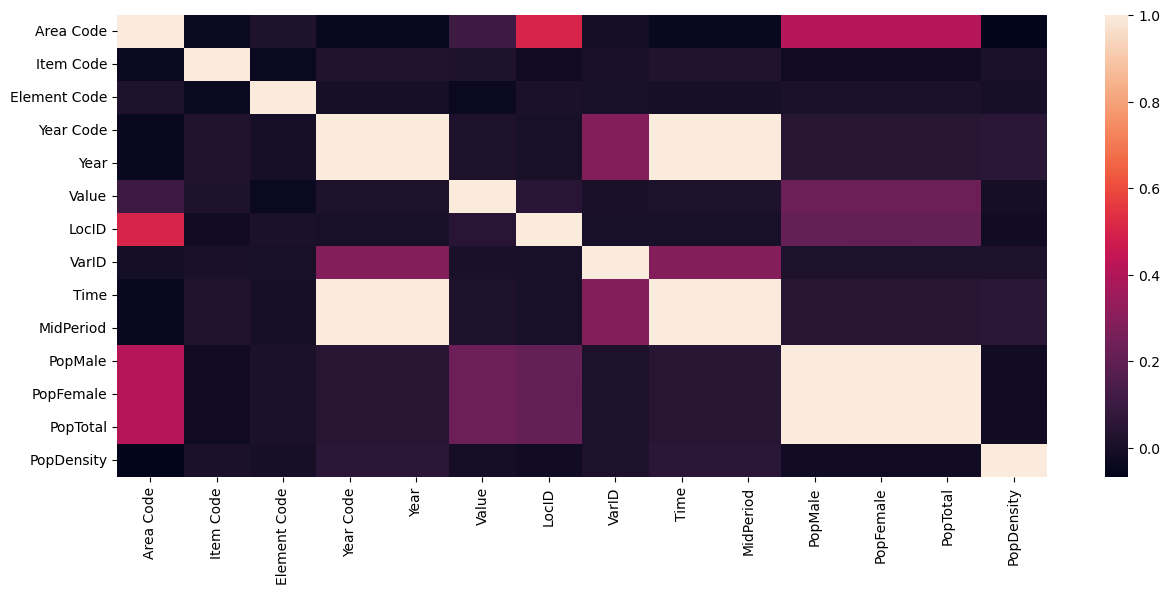

In [15]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr())
plt.show()

<AxesSubplot: >

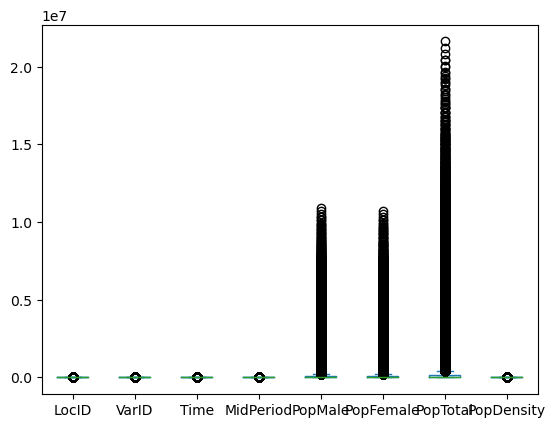

In [16]:
df_pop.plot.box()

# Cleaning:

In [17]:
df = df.drop(['Area','Area Code (M49)','Item','Item Code (CPC)','Element','Year','Year','Variant','Location','MidPeriod'], axis=1)

In [18]:
df.head()

,Area Code,Item Code,Element Code,Year Code,Unit,Value,Flag,LocID,VarID,Time,PopMale,PopFemale,PopTotal,PopDensity
0,2,221,5312,1975,ha,0.0,E,4,2,1975,6446.273,6242.891,12689.164,19.436
1,2,221,5510,1975,tonnes,0.0,E,4,2,1975,6446.273,6242.891,12689.164,19.436
2,2,515,5312,1975,ha,3270.0,E,4,2,1975,6446.273,6242.891,12689.164,19.436
3,2,515,5419,1975,hg/ha,85321.0,E,4,2,1975,6446.273,6242.891,12689.164,19.436
4,2,515,5510,1975,tonnes,27900.0,E,4,2,1975,6446.273,6242.891,12689.164,19.436
